# Sanjay Avva - Project III | Finished Ver
## Date: 12/16/25

### This project analyzes data from the 2024 StackOverFlow Developer Survey to identify meaningful trends across digital industries in relation to the developer expierence (Job, Language Favorites, Industry, etc).

##### Note: I left some of the sample() selectors uncollapsed because they show the differences happening, even though they are lengthy;


## Addt. Resources used:
### - Matplotlib docs (https://matplotlib.org/), help with styling syntax
### - Pandas docs (https://pandas.pydata.org/docs/), understanding exploded rows
### - Google Gemini, used to generate MatplotlibCM color maps (see code comment)
### - Intro to Python for Computer Science and Data Science, Textbook
### - https://survey.stackoverflow.co/, CSV Source

### Importing Pandas Library for Data Processing:

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

### Read in df from .csv
#### Column names are fine and are already short enough

In [ ]:
df = pd.read_csv("survey_results_public.csv")
df.head()

### Keep only columns relevant to questions:
1) Which languages do developers most want to learn, what language has the most equal desire-admire rate
2) Are certain industries strongly associated with specific programming languages
3) Which programming languages are associated with the highest salaries among survey respondents?
4) Which languages have the strongest overlap with high job satisfaction?
5) How do language preferences change after 5, 10, or 20+ years of coding? (thinking about excluding this)

In [33]:
df = df[['ResponseId','LanguageHaveWorkedWith','LanguageWantToWorkWith','LanguageAdmired','Industry','ConvertedCompYearly','CompTotal','JobSat','YearsCode','YearsCodePro']]

In [ ]:
df.sample()

### Turn all NaNs in Laungauges worked with into empty str (the resoponder skipped over the question, since all question resp were optional)

In [35]:
df["LanguageHaveWorkedWith"] = df["LanguageHaveWorkedWith"].fillna("") #applied to all langauge-related cols
df["LanguageWantToWorkWith"] = df["LanguageWantToWorkWith"].fillna("")
df["LanguageAdmired"] = df["LanguageAdmired"].fillna("")

In [ ]:
df.head()

### Turned strings of Language sep by ; into lists for easier data processing)

In [37]:
lang_cols = ["LanguageHaveWorkedWith","LanguageWantToWorkWith","LanguageAdmired"]

for col in lang_cols:
    df[col] = df[col].str.split(";") #using ; delimiter

In [ ]:
df.sample()

### Convert all industry col NaNs to Unknown

In [39]:
df["Industry"] = df["Industry"].fillna("Unknown")

In [ ]:
df.head()

In [ ]:
df.sample()

### Kept all NaNs in global df because did not want to shrink data by a large margin (as seen in milestone 3, there are a lot of NaNs), but created 3 seperate dfs where NaNs are dropped case-by-case. I will use each respective df for each question in the final project to create and compute visualizations.

In [42]:
salary_df = df.dropna(subset=["ConvertedCompYearly"])
salary_df = salary_df.dropna(subset=["CompTotal"])
jobsat_df = df.dropna(subset=["JobSat"])
exp_df = df.dropna(subset=["YearsCodePro"])
exp_df = exp_df.dropna(subset=["YearsCode"])



# MILESTONE IV STARTS HERE

### Answering Question 3: Which programming languages are associated with the highest salaries among survey respondents?



In [ ]:
salary_df.head()

In [44]:
#split column list content into special rows with each indiv item of ea list item
salary_df_exploded = salary_df.explode("LanguageHaveWorkedWith")
#get rid of empty lists
salary_df_exploded = salary_df_exploded[(salary_df_exploded["LanguageHaveWorkedWith"] != "") ]

salary_by_language = (
    salary_df_exploded
    .groupby("LanguageHaveWorkedWith")["ConvertedCompYearly"]
    .mean()
    .sort_values(ascending=False)
) #aggregation that groups laungauges with salary, sorts those pairs high to low by salary

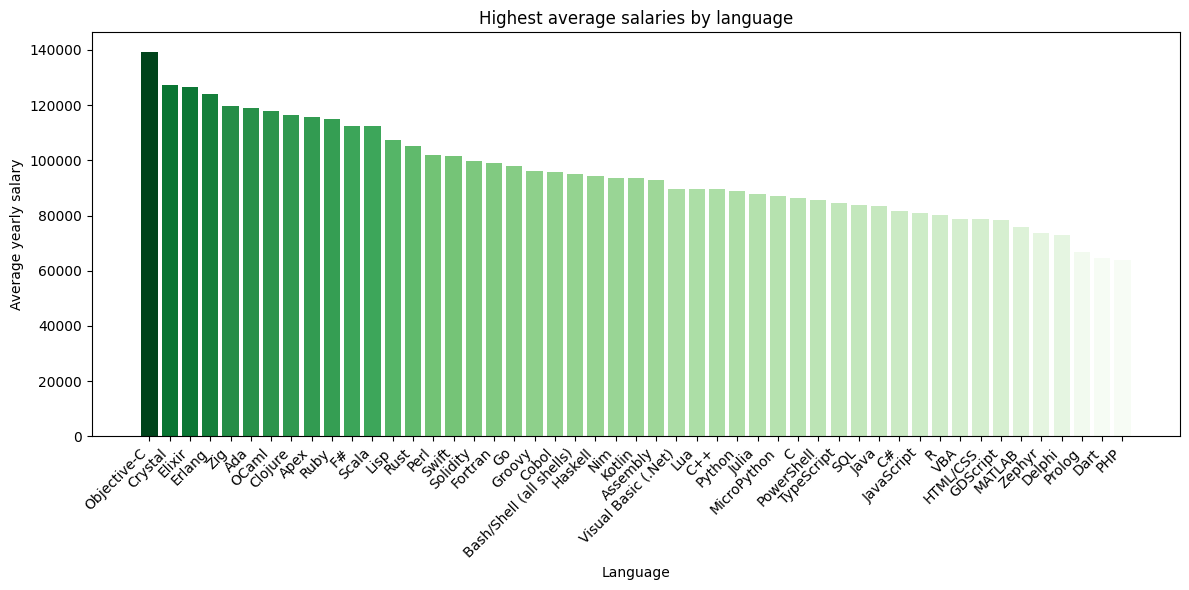

In [45]:
top = salary_by_language.head(50) #grab 50 most high-paying languages
x = np.arange(len(top)) #x-axis pts

norm = (top - top.min()) / (top.max() - top.min() + 1e-9) #maps salaries into green binry graidents
colors = plt.cm.Greens(norm.values)

plt.figure(figsize=(12, 6)) #plot styling
plt.bar(x, top.values, color=colors)
plt.xticks(x, top.index, rotation=45, ha="right")
plt.xlabel("Language")
plt.ylabel("Average yearly salary")
plt.title("Highest average salaries by language")
plt.tight_layout()
plt.show()

In [46]:
for i, (lang, sal) in enumerate(salary_by_language.items()):
    print(f"{i+1}. {lang}: ${sal}") #CLI presentation

1. Objective-C: $139413.7125
2. Crystal: $127322.75384615385
3. Elixir: $126513.85953177257
4. Erlang: $124113.61572052402
5. Zig: $119695.7431693989
6. Ada: $119046.96153846153
7. OCaml: $117756.48091603053
8. Clojure: $116396.29714285715
9. Apex: $115538.43069306931
10. Ruby: $114810.68294460641
11. F#: $112605.80555555556
12. Scala: $112440.86435786435
13. Lisp: $107436.28852459017
14. Rust: $105349.97906657515
15. Perl: $102082.45470692718
16. Swift: $101592.10843373495
17. Solidity: $99666.68
18. Fortran: $98925.4387755102
19. Go: $97911.85767790262
20. Groovy: $96078.34811529933
21. Cobol: $95695.73643410853
22. Bash/Shell (all shells): $94970.11022607473
23. Haskell: $94288.09401709402
24. Nim: $93782.61764705883
25. Kotlin: $93732.99862574438
26. Assembly: $92810.82317801673
27. Visual Basic (.Net): $89665.92535675083
28. Lua: $89540.38511326861
29. C++: $89527.56580453193
30. Python: $88970.04996931709
31. Julia: $87790.01951219513
32. MicroPython: $87086.34
33. C: $86467.3023

## Verdict: Objective-C (not c), Crystal, Elixir,  Erlang and Zig are among the languages associated with high average salary. Interesting that more niche and unpopular laungauges are at the top while common languages are towards the middle.

### Answering Question 4: Which languages have the strongest overlap with high job satisfaction?


In [ ]:
jobsat_df.head()

In [48]:
#split job list content into special rows with each indiv item of ea list item
jobsat_df_exploded = jobsat_df.explode("LanguageHaveWorkedWith")
#get rid of empty lists
jobsat_df_exploded = jobsat_df_exploded[(jobsat_df_exploded["LanguageHaveWorkedWith"] != "")]

jobsat_by_language = (
    jobsat_df_exploded
    .groupby("LanguageHaveWorkedWith")["JobSat"]
    .mean()
    .sort_values(ascending=False)
) #aggregation that groups languages with job satisfation, sorts those pairs high to low by jobsat

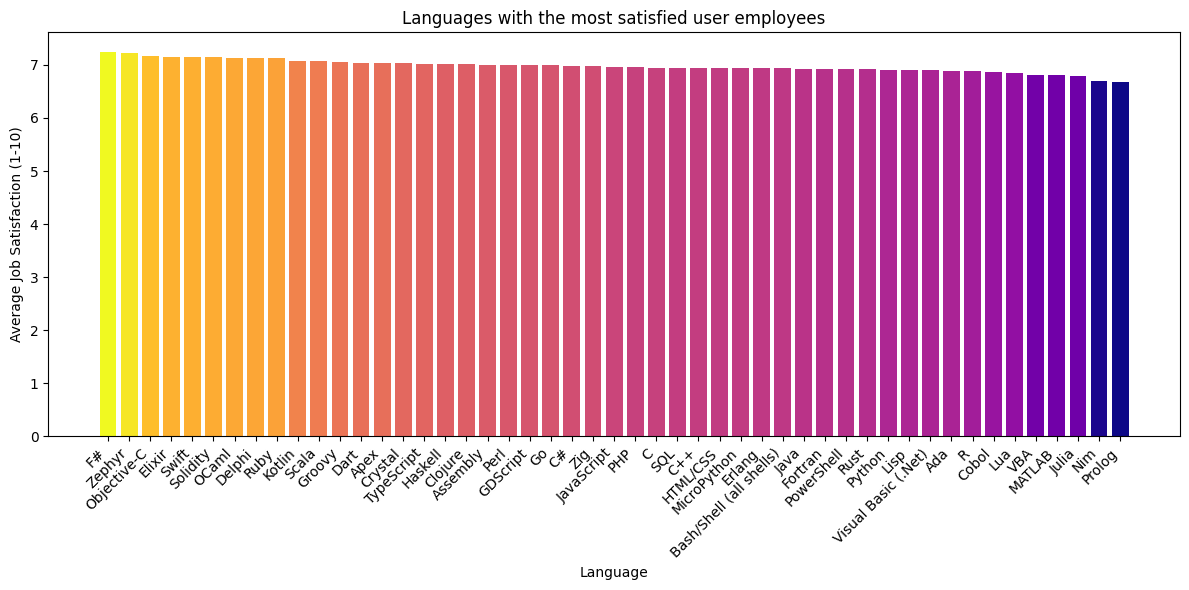

In [49]:
top20 = jobsat_by_language.head(50) #top 50 happpiest language user types
x = np.arange(len(top20)) #x-axis

norm = (top20 - top20.min()) / (top20.max() - top20.min() + 1e-9) #gradient mapping to plasma colorway
colors = plt.cm.plasma(norm.values)

plt.figure(figsize=(12,6)) #plot+styling
plt.bar(x, top20.values, color=colors)
plt.xticks(x, top20.index, rotation=45, ha="right")
plt.xlabel("Language")
plt.ylabel("Average Job Satisfaction (1-10)")
plt.title("Languages with the most satisfied user employees")
plt.tight_layout()
plt.show()

In [50]:

for i, (lang, score) in enumerate(jobsat_by_language.items(), start=1):
    print(f"{i}. {lang}: {score}") #CLI presentation

1. F#: 7.250936329588015
2. Zephyr: 7.225
3. Objective-C: 7.1715160796324655
4. Elixir: 7.1515601783060925
5. Swift: 7.149466192170818
6. Solidity: 7.144694533762058
7. OCaml: 7.1381578947368425
8. Delphi: 7.135193133047211
9. Ruby: 7.128293241695304
10. Kotlin: 7.077213452299245
11. Scala: 7.0663507109004735
12. Groovy: 7.052181351582549
13. Dart: 7.043087971274685
14. Apex: 7.040983606557377
15. Crystal: 7.028301886792453
16. TypeScript: 7.024364997213154
17. Haskell: 7.011764705882353
18. Clojure: 7.010840108401084
19. Assembly: 7.002608695652174
20. Perl: 6.997175141242938
21. GDScript: 6.992307692307692
22. Go: 6.990574712643678
23. C#: 6.977598879943997
24. Zig: 6.975510204081632
25. JavaScript: 6.96017316017316
26. PHP: 6.952534039334342
27. C: 6.950779327317473
28. SQL: 6.944547938400397
29. C++: 6.944224479256326
30. HTML/CSS: 6.941057836185024
31. MicroPython: 6.941011235955056
32. Erlang: 6.93609022556391
33. Bash/Shell (all shells): 6.934125573126228
34. Java: 6.92374627891

## Verdict: On average, F-sharp, zephyr, objective-c and elixir and Swift have the most satisfied developers in jobs. Another interesting point that 4/5 of these laungauges are all in the top 20 of most average salary; does this mean that money is a factor in an developers's job satisfaction? Also, note that Objective-C and Swift both are ios dev languages, so apple does a good job of making their developers happy.

### Answering Question 1: Which languages do developers most want to learn, what language has the most equal desire-admire rate



In [ ]:
df.head()

In [52]:
want = df["LanguageWantToWorkWith"].explode() #1 lan per row for processing
admire = df["LanguageAdmired"].explode()

want_counts = want.value_counts() #count each lan appearance in wants
admire_counts = admire.value_counts() #count each lan appearance in admire

lang_compare = pd.concat([want_counts, admire_counts], axis=1) #combine into 1 table
lang_compare.columns = ["WantCount", "AdmireCount"]

lang_compare["Ratio"] = lang_compare["WantCount"] / lang_compare["AdmireCount"].replace(0, pd.NA) #want/admire = desire-admire rate
lang_compare["RatioDistance"] = (lang_compare["Ratio"] - 1).abs() #add col to measure in relativiity to equality (1 ratio)

In [60]:
want_counts.head(10)

,count
LanguageWantToWorkWith,
Python,25047
JavaScript,23774
SQL,22400
HTML/CSS,20721
TypeScript,20239
Rust,17232
Go,13837
Bash/Shell (all shells),13744
C#,12921


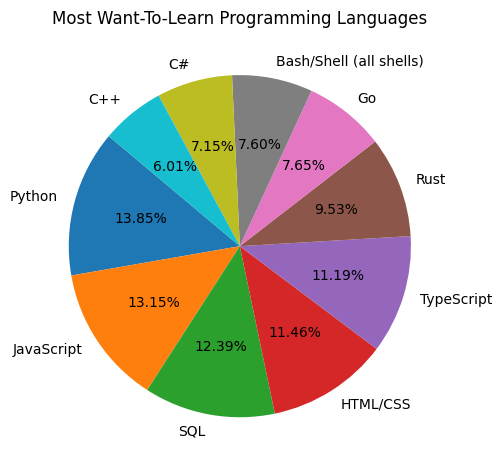

In [54]:
top_want = want_counts.head(10)
#10 most wanted language for pichart -> chosen for styling purposes, and 15+ would provide unecesary lans

plt.pie( #pichart styling
    top_want.values,
    labels=top_want.index,
    autopct="%1.2f%%",
    startangle=140
)

plt.title("Most Want-To-Learn Programming Languages")
plt.tight_layout()
plt.show()

In [55]:
lang_compare.sort_values("RatioDistance").head(25)

,WantCount,AdmireCount,Ratio,RatioDistance
HTML/CSS,20721,19851,1.043827,0.043827
Bash/Shell (all shells),13744,12776,1.075767,0.075767
SQL,22400,20692,1.082544,0.082544
JavaScript,23774,21869,1.087110,0.087110
PowerShell,4287,3603,1.189842,0.189842
PHP,5745,4793,1.198623,0.198623
Python,25047,20774,1.205690,0.205690
Java,10668,8687,1.228042,0.228042
C#,12921,10458,1.235513,0.235513
TypeScript,20239,16079,1.258723,0.258723


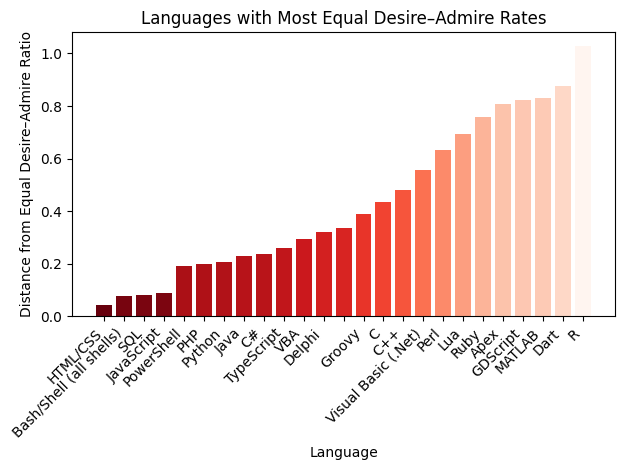

In [56]:
top_equal = lang_compare.sort_values("RatioDistance").head(25) #get 25 closest lans with 1 rate

values = top_equal["RatioDistance"].values #get heights

norm = (values - values.min()) / (values.max() - values.min()) #apply red gradient
colors = plt.cm.Reds_r(norm) #reverse gradient to show close is priority

plt.bar(top_equal.index, values, color=colors) #bar graph styling
plt.xlabel("Language")
plt.ylabel("Distance from Equal Desire–Admire Ratio")
plt.title("Languages with Most Equal Desire–Admire Rates")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Verdict: The languages that most developers want to learn include python, JS, SQL, HTML/CSS and TypeScript. While the laungauges with the higest want-interest rate (developers both want to learn, and are actually interested in  are HTML/CSS, JS, Bash/Shell, SQL and PHP. It appears a majority of the developer base wants to learn a lot of the core common laungauges that they might use daily in the workforce.

### Answering Q5: Are certain industries strongly associated with specific programming languages

In [57]:
industry_counts = salary_df["Industry"].value_counts()
industry_order = industry_counts.index.tolist() #common to l-common

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


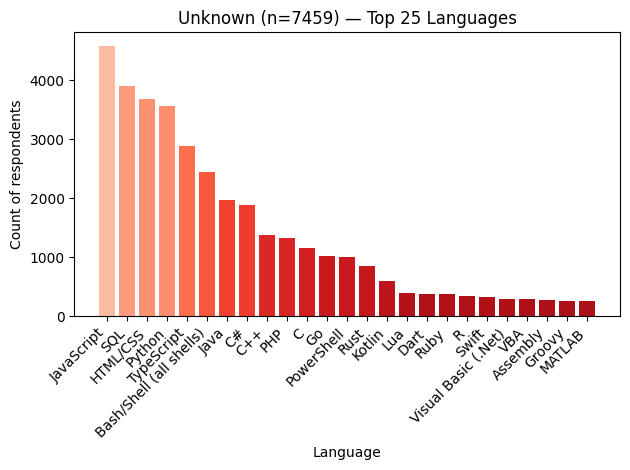

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


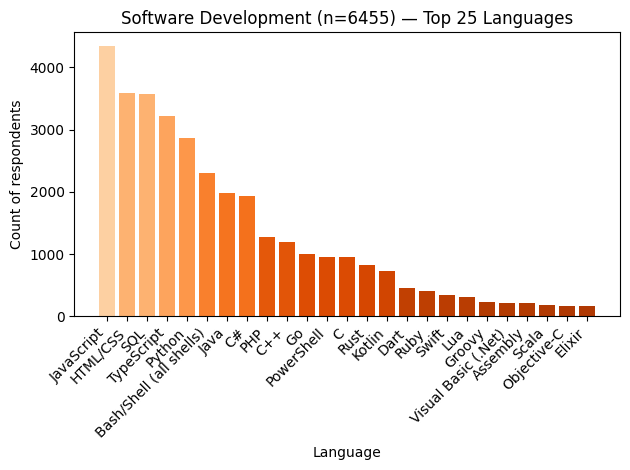

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


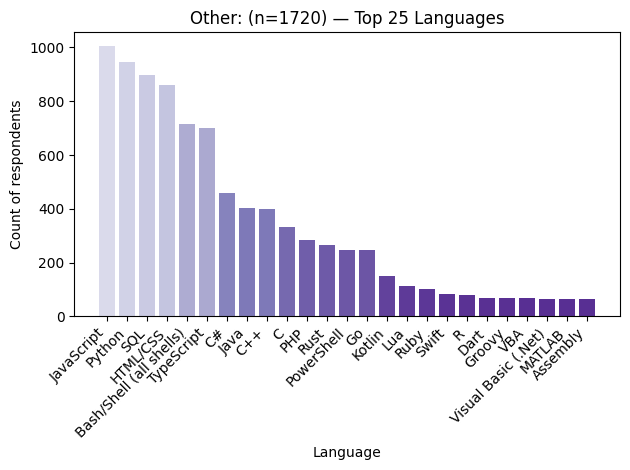

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


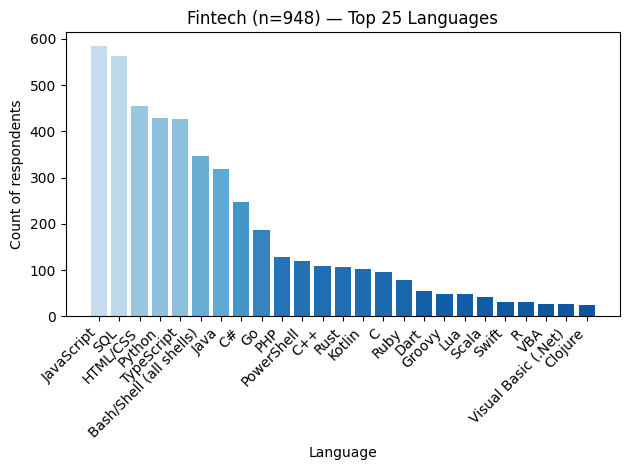

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


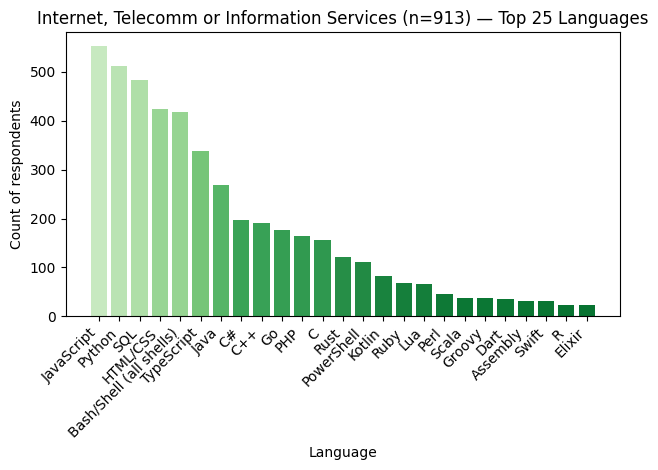

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


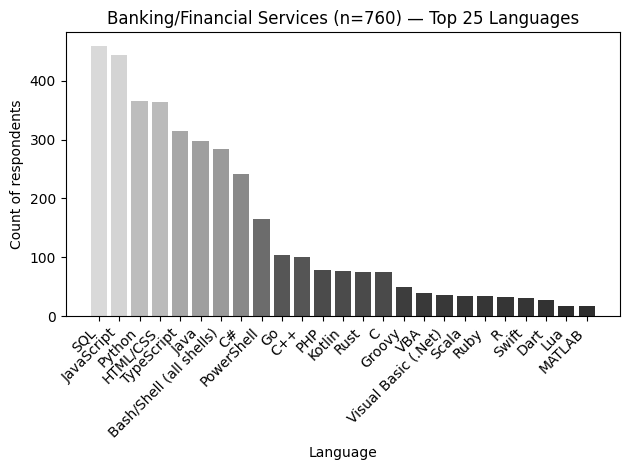

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


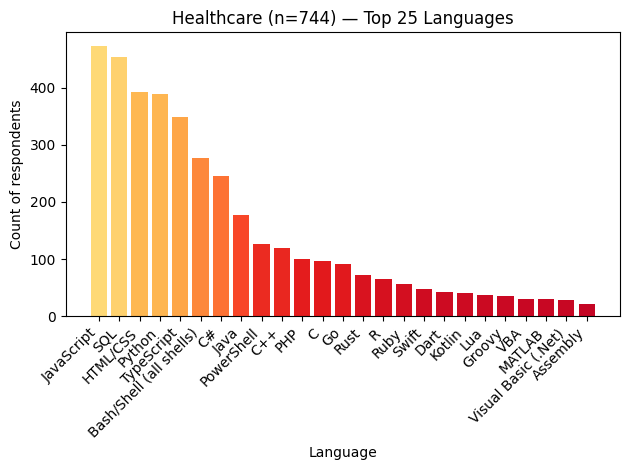

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


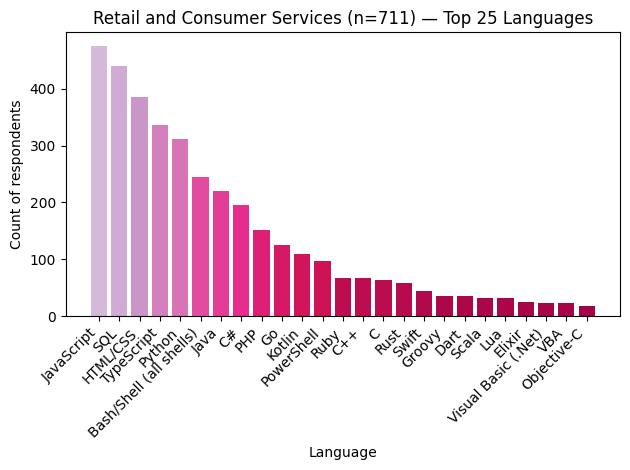

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


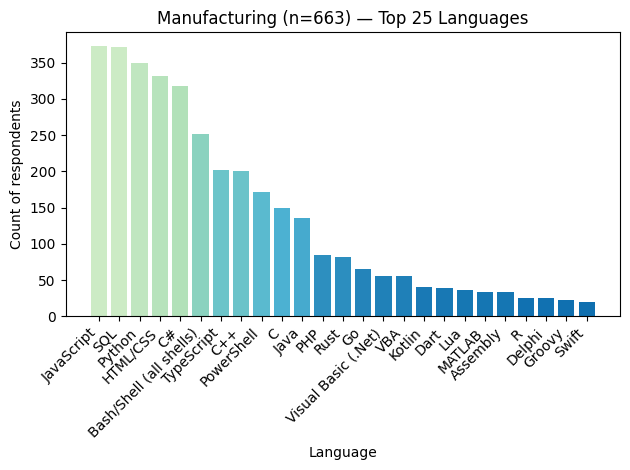

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


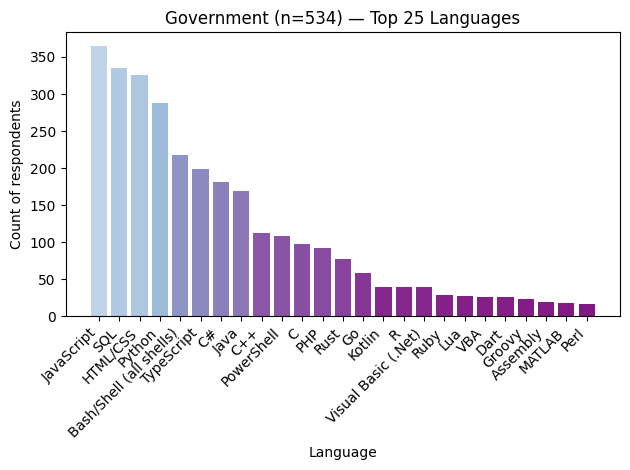

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


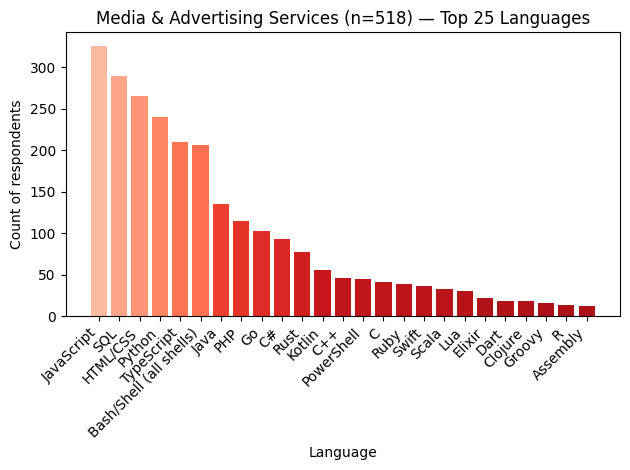

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


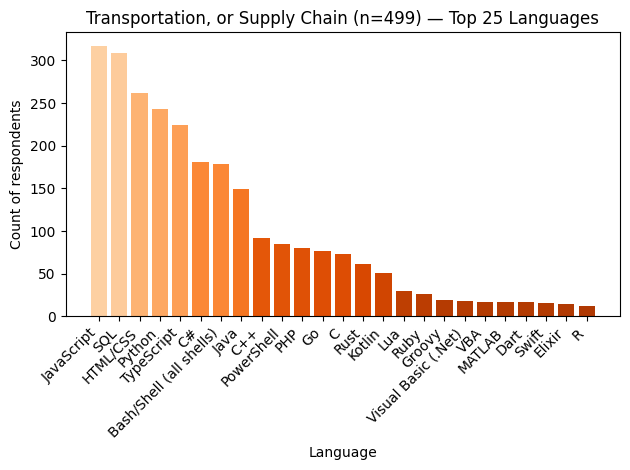

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


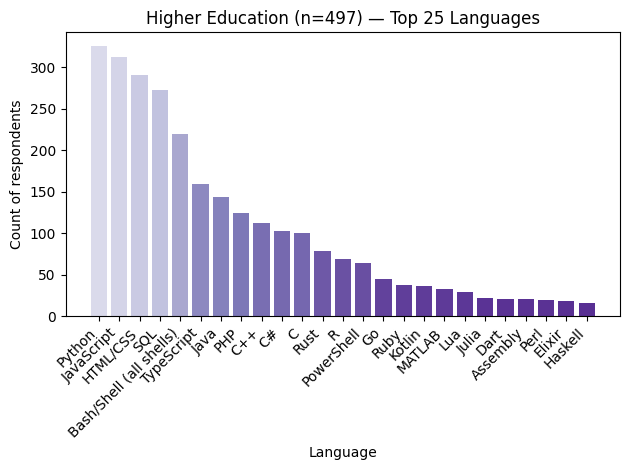

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


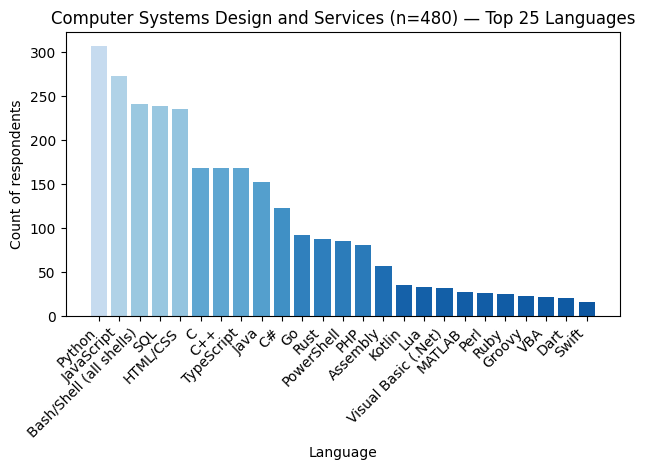

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


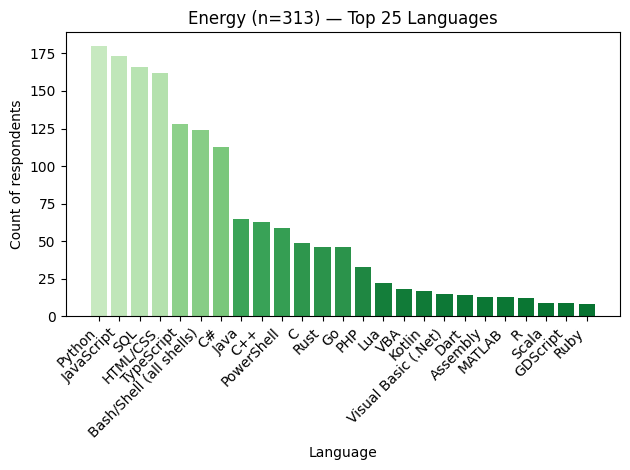

/tmp/ipython-input-2409360275.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors


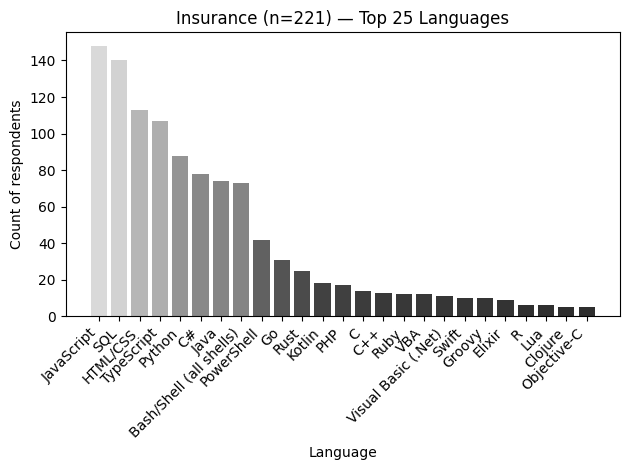

In [58]:
cmap_names = [
    "Reds", "Oranges", "Purples", "Blues", "Greens", #Used Gemini for help looping through matplotlib's cm palettes
    "Greys", "YlOrRd", "PuRd", "GnBu", "BuPu"
] #for color variation

for i, industry in enumerate(industry_order): #loop through all industries
    sub = salary_df[salary_df["Industry"] == industry] #focus to one industry

    lang_counts = (
        sub["LanguageHaveWorkedWith"] #get data on used lan
        .explode()
        .value_counts()
        .head(25) #top 25 lan in ea
    )

    cmap = cm.get_cmap(cmap_names[i % len(cmap_names)]) #map colors
    vals = lang_counts.values.astype(float)
    norm = (vals - vals.min()) / (vals.max() - vals.min() + 1e-9)
    colors = cmap(0.85 - 0.60 * norm)

    plt.bar(lang_counts.index, lang_counts.values, color=colors) #plot styling

    title_industry = "Unknown" if (industry is np.nan) else str(industry)
    plt.title(f"{title_industry} (n={len(sub)}) — Top 25 Languages")
    plt.xlabel("Language")
    plt.ylabel("Count of respondents")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    print("\n" * 2) #space inbetween ea graph


### Verdict: The top-25 language distributions reveal that industries share a strict common foundation of JS, SQL, HTML/CSS & python indicating these languages as foundational all throughout industries regardless of domain. However, certain patterns between domains begin to show through in the usage of secondary languages. Internet & Telecom roles emphaize system languages like C, C++, Go & Perl. Fintech, Health and other data driven sectors like more data statistic tools found in VBA, MATLAB and R, which follows their job theme. Roles that involve working with low-level technologies, like Supply-Chain and Government tend to use older frameworks like RubyOnRails and Delphi.